# Goal: Check whether the snn package works

In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

In [2]:
from snn.components.neuron_class import Neuron
from snn.components.synapse_class import Synapse
from snn.components.network_class import *
from snn.functions import get_psp_waveform

# Test

Text(0.5, 1.0, 'PSP waveform')

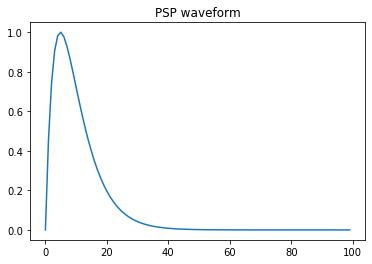

In [3]:
dt=1e-3
h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)
plt.plot(h)
plt.title("PSP waveform")

In [4]:
w = 1.8

Peak of v_post=0.6678441076099687


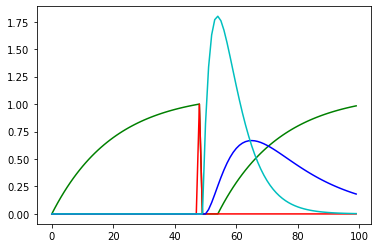

In [20]:
net = Network('net')
n1 = Neuron('n1')
n2 = Neuron('n2')
net.add_neuron(n1)
net.add_neuron(n2)

syn = Synapse('syn_12', n1, n2, h, w=w)
net.add_synapse(syn)

T = 100

probe = net.initialize(probe=True, T_total = T)

v_ext = np.zeros((2, T))
v_ext[0,:] = 1.1*np.ones((1, T)) #input only to neuron n1


tic = time.time()
for ti in range(T):
    net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
    
# print(f"Time elapsed for {T} iterations: {time.time()-tic} s")

plt.plot(probe['v'][n1.id, :], 'g')
plt.plot(probe['spike'][n1.id, :], 'r')
plt.plot(probe['v'][n2.id, :], 'b')
plt.plot(probe['psp'][syn.id,:],'c')

print(f"Peak of v_post={np.amax(probe['v'][n2.id, :])}")

In [6]:
def v_post_peak(w):
    net = Network('net')
    n1 = Neuron('n1')
    n2 = Neuron('n2')
    net.add_neuron(n1)
    net.add_neuron(n2)

    syn = Synapse('syn_12', n1, n2, h, w=w)
    net.add_synapse(syn)


    # print([net.neurons[j].name for j in range(len(net.neurons))])
    # print(net.synapses[0].name)

    T = 100

    probe = net.initialize(probe=True, T_total = T)

    v_ext = np.zeros((2, T))
    v_ext[0,:] = 1.1*np.ones((1, T)) #input only to neuron n1


    tic = time.time()
    for ti in range(T):
        net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)

    # print(f"Time elapsed for {T} iterations: {time.time()-tic} s")

    # plt.plot(probe['spike'][n1.id, :], 'r')
    # plt.plot(probe['v'][n2.id, :], 'b')
    v_post_peak = np.amax(probe['v'][n2.id, :])
#     print(f"Peak of v_post={v_post_peak}")
    return v_post_peak

In [7]:
w_vals = np.arange(0, 5, 0.2)
peak_vals = np.zeros((len(w_vals),))
for i in range(len(w_vals)):
    peak_vals[i] = v_post_peak(w_vals[i])


In [8]:
w_vals[peak_vals>1]

array([2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

In [9]:
threshold_w = w_vals[peak_vals>1][0]
print(f'Threshold weight={threshold_w}')

Threshold weight=2.8000000000000003


Text(0.5, 0.98, '|v_post|_max vs w')

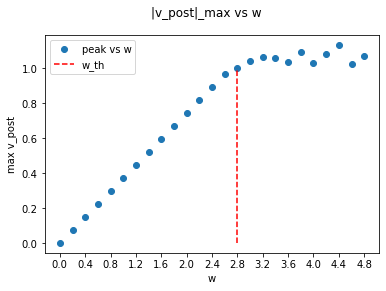

In [18]:
plt.plot(w_vals, peak_vals, 'o')
plt.plot([threshold_w, threshold_w], [0, 1], 'r--')
plt.legend(['peak vs w', 'w_th'])
plt.xticks([0.4*i for i in range(13)])
plt.xlabel('w')
plt.ylabel("max v_post")
fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
fig.suptitle("|v_post|_max vs w")
# fig.savefig('D:/intern/summer_2021/usc_viterbi/code_final/images_results/w_for_postspike.png', dpi=100)

In [11]:
w_vals[peak_vals>1]

array([2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

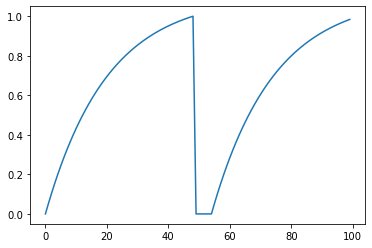

In [12]:
plt.plot(probe['v'][n1.id, :])